In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from numpy import genfromtxt
data1 = genfromtxt('data1.csv', delimiter=',')
X = data1[:,:-1]
y = data1[:, -1]

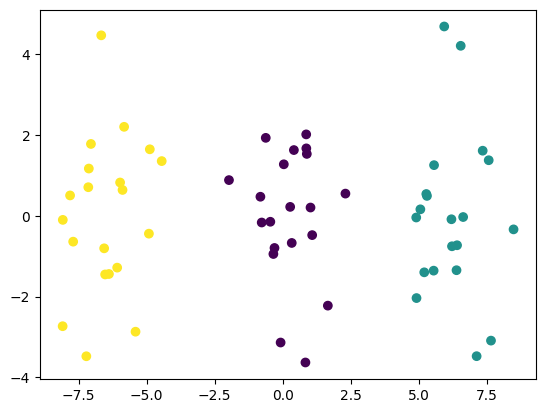

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(X)
scores = pca.transform(X)
z0, z1 = scores[:,0], scores[:,1]
plt.figure()
plt.scatter(z0, z1, c=y)
plt.show()

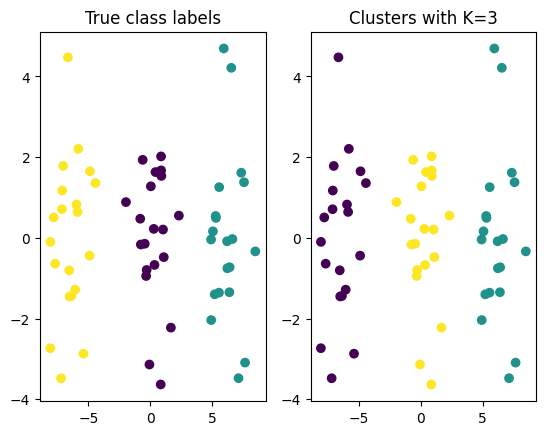

In [4]:
from sklearn.cluster import KMeans
kmeans3 = KMeans(n_clusters=3, random_state=0, n_init='auto').fit(X)
plt.figure()

plt.subplot(1,2,1)
plt.title("True class labels")
plt.scatter(z0, z1, c=y)

plt.subplot(1,2,2)
plt.title("Clusters with K=3")
plt.scatter(z0, z1, c=kmeans3.labels_)

plt.show()

The K-means clusters seem to match the true class labels

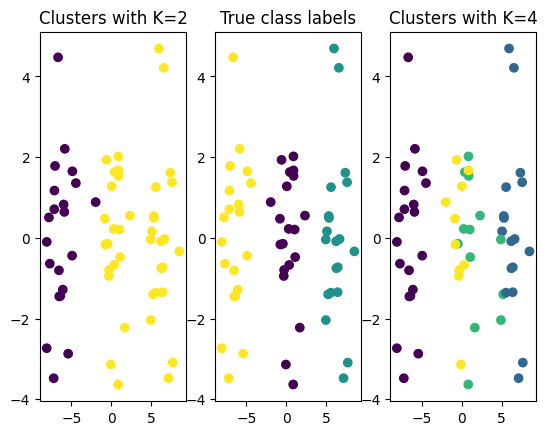

In [5]:
plt.figure()

kmeans2 = KMeans(n_clusters=2, random_state=0, n_init='auto').fit(X)
plt.subplot(1,3,1)
plt.title("Clusters with K=2")
plt.scatter(z0, z1, c=kmeans2.labels_)

plt.subplot(1,3,2)
plt.title("True class labels")
plt.scatter(z0, z1, c=y)

kmeans4 = KMeans(n_clusters=4, random_state=0, n_init='auto').fit(X)
plt.subplot(1,3,3)
plt.title("Clusters with K=4")
plt.scatter(z0, z1, c=kmeans4.labels_)

plt.show()

Using only two clusters produces one cluster that is almost the same as one of the original labels, while the other is a merging of the other two classes.

In the case of four clusters, we get two clusters that are mostly the same as two of the original labels while the other two clusters result from splitting the third label.

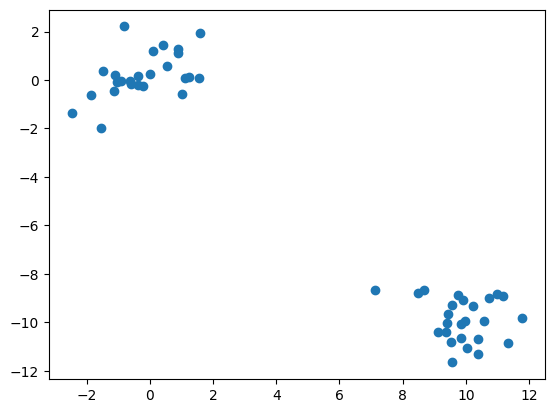

In [6]:
data2 = np.genfromtxt('data2.csv', delimiter=',')
plt.scatter(data2[:,0], data2[:,1])
plt.show()

It looks like the data has two distinct clusters.

In [7]:
# Inter Observational Distance
import math
from itertools import combinations

n,_p = data2.shape
nC2 = math.comb(n,2)
iod = np.zeros((nC2,))
for k, (i,j) in enumerate(combinations(range(n), r=2)):
    iod[k] = np.linalg.norm(data2[i] - data2[j])

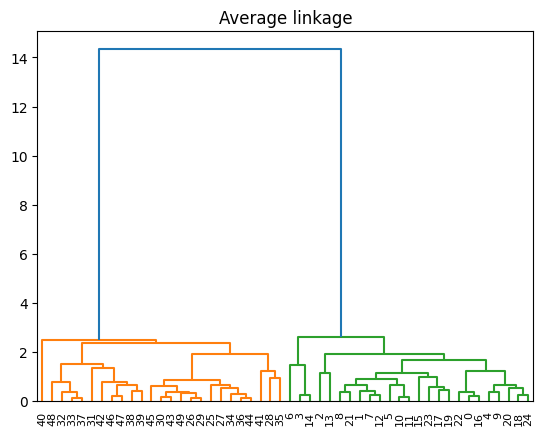

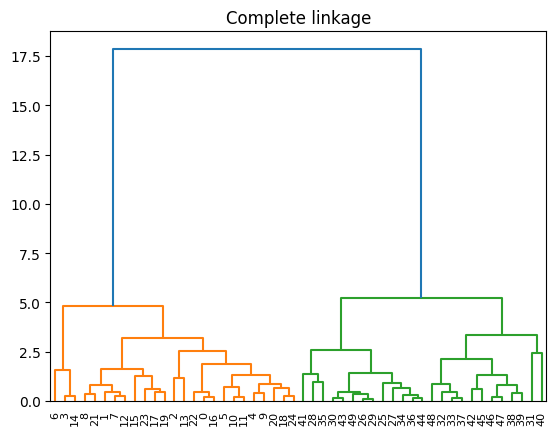

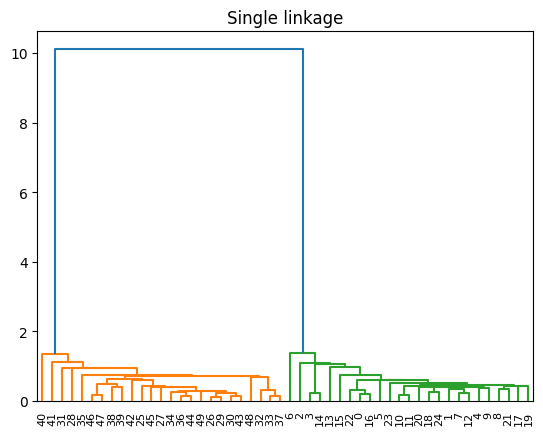

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage

average = linkage(iod, 'average')
plt.figure()
plt.title("Average linkage")
dendrogram(average)
plt.show()

complete = linkage(iod, 'complete')
plt.figure()
plt.title("Complete linkage")
dendrogram(complete)
plt.show()

single = linkage(iod, 'single')
plt.figure()
plt.title("Single linkage")
dendrogram(single)
plt.show()

Cutting the the dendrograms at height 7 gives two clusters for all of the linkage methods 

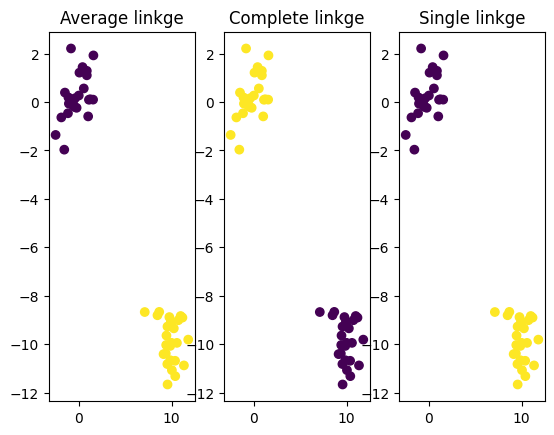

In [9]:
from scipy.cluster.hierarchy import fcluster

plt.figure()
X1 = data2[:,0]
X2 = data2[:,1]
cut = 7

avg_labels = fcluster(average, cut, criterion='distance')
plt.subplot(1,3,1)
plt.title("Average linkge")
plt.scatter(X1, X2, c=avg_labels)


comp_labels = fcluster(complete, cut, criterion='distance')
plt.subplot(1,3,2)
plt.title("Complete linkge")
plt.scatter(X1, X2, c=comp_labels)


sing_labels = fcluster(single, cut, criterion='distance')
plt.subplot(1,3,3)
plt.title("Single linkge")
plt.scatter(X1, X2, c=sing_labels)

plt.show()